## Collect dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
file = r'dataset\features\EURUSD_4.csv'
df = pd.read_csv(file)
df.set_index('date', inplace=True, drop=True)

## Features and Targets

In [13]:
features = df.copy()
features = features.drop(['open_24', 'close_24'], axis=1)
# features = df[['open', 'high', 'low', 'close','bb_bbm_6',
#        'bb_bbh_6', 'bb_bbl_6', 'bb_bbm_12', 'bb_bbh_12', 'bb_bbl_12',
#        'bb_bbm_18', 'bb_bbh_18', 'bb_bbl_18', 'bb_bbm_24', 'bb_bbh_24',
#        'bb_bbl_24', 'bb_bbm_30', 'bb_bbh_30', 'bb_bbl_30', 'bb_bbm_36',
#        'bb_bbh_36', 'bb_bbl_36']].copy()
features = df[['open', 'high', 'low']].copy()
targets = df[['open_24', 'close_24']].copy()*10000

corr = df.corr()
# sns.heatmap(round(corr,2), annot=True)
# plt.show()
print(corr[corr['close_24'] > 0.6].iloc[:,-1])
# print(corr.iloc[:,-1])
# print(features.info())

open         0.990935
high         0.991057
low          0.991185
close        0.991331
WPC          0.991306
HA_open      0.990630
HA_high      0.990942
HA_low       0.991107
HA_close     0.991234
EMA_4        0.991097
EMA_8        0.990703
EMA_16       0.989903
EMA_32       0.988323
bb_bbm_4     0.990971
bb_bbh_4     0.990369
bb_bbl_4     0.990642
bb_bbm_8     0.990447
bb_bbh_8     0.989377
bb_bbl_8     0.989814
bb_bbm_16    0.989394
bb_bbh_16    0.987611
bb_bbl_16    0.988292
bb_bbm_32    0.987313
bb_bbh_32    0.984424
bb_bbl_32    0.985467
open_24      0.999613
close_24     1.000000
Name: close_24, dtype: float64


In [14]:
cols = features.columns.values
# dcorr = features[cols].corr()
# mask = np.zeros_like(dcorr)
# mask[np.triu_indices_from(mask)] = True

# fig, ax = plt.pyplot.subplots(figsize = (7,5))
# sns.heatmap(dcorr,cmap=sns.diverging_palette(10,145,n=100),
#     vmin=1,vmax=1,center=0,linewidths=1,annot=True,mask=mask,ax=ax)

## Scaler Data

In [15]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc_X = StandardScaler()
x = sc_X.fit_transform(features.values)


In [16]:
pca = PCA(n_components=3)
pca.fit(x)
score = pca.fit_transform(x)
print(score.shape)
# pca_featues = pd.DataFrame(score, columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_features = pd.DataFrame(score, columns =['PC1','PC2','PC3'])
# pca_featues.to_csv(r'dataset/features/EURUSD_pca.csv',index=False)
# pca.components_ #Eigenvectors

(35506, 3)


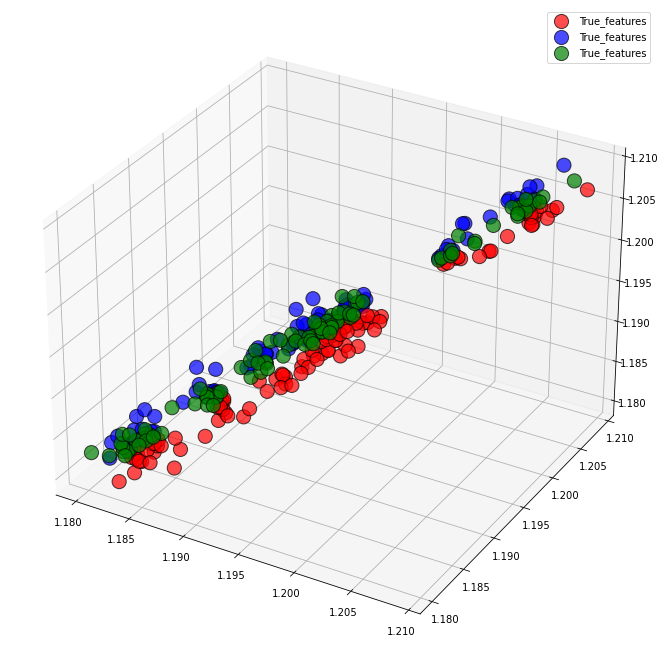

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 9))
ax = Axes3D(fig)
y = features.iloc[:100,0]
x = features.iloc[:100,1]
z = features.iloc[:100,2]

# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z,
#            linewidths=1, alpha=.7,
#            edgecolor='k',
#            s = 200,
#            c=z)
# plt.show()
ax.scatter(x,y,z, label="True_features",linewidths=1, alpha=.7,
           edgecolor='k', c="red",
           s = 200)
ax.scatter(z,x,y, label="True_features",linewidths=1, alpha=.7,
           edgecolor='k', c="blue",
           s = 200)
ax.scatter(y,z,x, label="True_features",linewidths=1, alpha=.7,
           edgecolor='k', c="green",
           s = 200)

ax.legend()

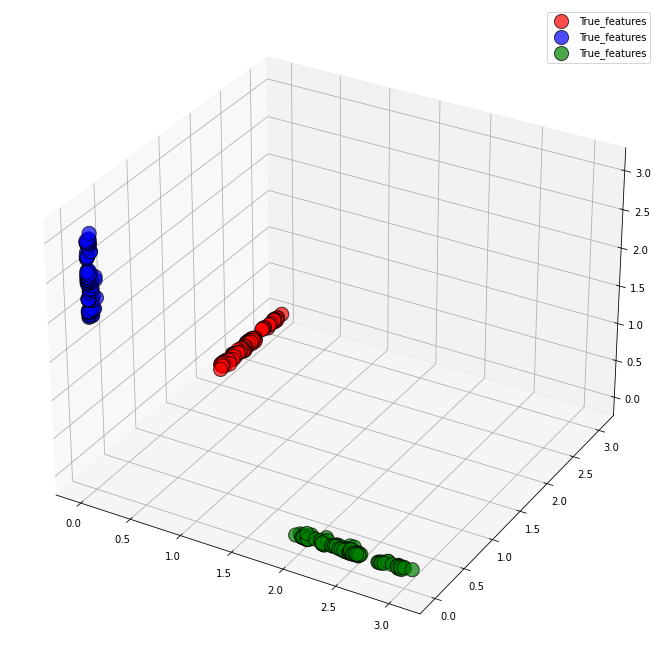

In [19]:
fig = plt.figure(figsize=(9, 9))
ax = Axes3D(fig)
y = pca_features.iloc[:100,0]
x = pca_features.iloc[:100,1]
z = pca_features.iloc[:100,2]

# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z,
#            linewidths=1, alpha=.7,
#            edgecolor='k',
#            s = 200,
#            c=z)
# plt.show()
ax.scatter(x,y,z, label="True_features",linewidths=1, alpha=.7,
           edgecolor='k', c="red",
           s = 200)
ax.scatter(z,x,y, label="True_features",linewidths=1, alpha=.7,
           edgecolor='k', c="blue",
           s = 200)
ax.scatter(y,z,x, label="True_features",linewidths=1, alpha=.7,
           edgecolor='k', c="green",
           s = 200)

ax.legend()